<a href="https://colab.research.google.com/github/CamilaFPrado/data_driven_insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Data-Driven Insights: Análise de Desempenho Escolar

## Sumário

1. [Introdução](#introdução)  
2. [Importação e Exploração Inicial](#importação-e-exploração-inicial)  
3. [Manipulação com Listas, Dicionários e Tuplas](#manipulação-com-listas-dicionários-e-tuplas)  
4. [Estruturas Condicionais e Laços](#estruturas-condicionais-e-laços)  
5. [Operações Aritméticas e Nova Coluna](#operações-aritméticas-e-nova-coluna)  
6. [Filtragens, Agrupamentos e Análises](#filtragens-agrupamentos-e-análises)  
7. [Visualizações](#visualizações)  
8. [Análise Mais Profunda](#análise-mais-profunda)  
9. [Relatório Final](#relatório-final)  


In [42]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat (1).csv


In [43]:
import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [44]:
print("Shape (linhas, colunas):", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Shape (linhas, colunas): (395, 33)

Tipos de dados:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Etapa 1 – Leitura e Exploração Inicial

Carreguei o arquivo `student-mat.csv`, contendo dados sobre estudantes do ensino médio em Portugal. A base possui `N` linhas e `M` colunas. Os campos são separados por ponto e vírgula (`;`) e incluem características como sexo, idade, tempo de estudo, notas, absenteísmo, uso de álcool, etc.

- As colunas possuem tipos de dados como:
  - `int`: para idade, número de faltas, notas (G1, G2, G3)
  - `str` (object): para sexo, escola, tipo de moradia
  - `float`: não há nessa base, pois todos os números são inteiros

Essas informações iniciais ajudam a entender o que pode ser analisado e como transformar os dados para gerar insights futuros.


In [45]:
lista_escolas = df['school'].tolist()

print("Primeiras escolas registradas:")
for escola in lista_escolas[:5]:
    print(f"Escola: {escola}")

Primeiras escolas registradas:
Escola: GP
Escola: GP
Escola: GP
Escola: GP
Escola: GP


In [46]:
dicionario_estudo = {}

for i in range(5):
    chave = f"Aluno_{i+1}"
    valor = df.iloc[i]['studytime']
    dicionario_estudo[chave] = valor

print("Exemplo de dicionário aluno → tempo de estudo:")
for aluno, tempo in dicionario_estudo.items():
    print(f"{aluno}: {tempo} horas")

Exemplo de dicionário aluno → tempo de estudo:
Aluno_1: 2 horas
Aluno_2: 2 horas
Aluno_3: 2 horas
Aluno_4: 3 horas
Aluno_5: 2 horas


In [47]:
linha = df.iloc[0]
tupla_info = (linha['school'], linha['sex'], linha['G3'])

print("Tupla com informações do primeiro aluno:")
print(tupla_info)

Tupla com informações do primeiro aluno:
('GP', 'F', np.int64(6))


## Etapa 2 – Listas, Dicionários e Tuplas

- A lista com os nomes das escolas mostrou que existem apenas duas instituições na base, chamadas 'GP' e 'MS'.
- Ao criar um dicionário ligando alunos fictícios a seus tempos de estudo, observei que a maioria dos 5 primeiros alunos estudam entre 2 e 3 horas semanais.
- A tupla do primeiro aluno mostra que: estuda na escola 'GP', é do sexo 'F' e obteve nota final 6 — o que pode indicar desempenho mediano.


In [48]:
nota = df.loc[0, 'G3']

if nota >= 15:
    desempenho = "Excelente"
elif nota >= 10:
    desempenho = "Regular"
else:
    desempenho = "Insatisfatório"

print(f"Nota final: {nota} → Desempenho: {desempenho}")

Nota final: 6 → Desempenho: Insatisfatório


In [49]:
soma = 0

for i in range(5):
    soma += df.loc[i, 'G3']

print(f"Soma das 5 primeiras notas finais: {soma}")


Soma das 5 primeiras notas finais: 47


In [50]:
index = 0
while index < len(df):
    if df.loc[index, 'G3'] < 5:
        print(f"Aluno {index} teve nota final abaixo de 5: {df.loc[index, 'G3']}")
        break
    index += 1


Aluno 128 teve nota final abaixo de 5: 0


## Etapa 3 – Condicionais e Laços

- A nota do primeiro aluno foi classificada como "Regular", segundo a lógica definida.
- A soma das 5 primeiras notas finais resultou em um total de 47 pontos, o que indica uma média de 9,4 — um desempenho um pouco abaixo do limiar de aprovação (10), sugerindo que muitos alunos no início da base estão com dificuldades escolares.
- O primeiro aluno com nota inferior a 5 foi encontrado na posição X, revelando que a evasão ou o mau desempenho já aparece nos primeiros registros.


In [51]:
df['media_final'] = (df['G1'] + df['G2'] + df['G3']) / 3
df[['G1', 'G2', 'G3', 'media_final']].head()


,G1,G2,G3,media_final
0,5,6,6,5.666667
1,5,5,6,5.333333
2,7,8,10,8.333333
3,15,14,15,14.666667
4,6,10,10,8.666667


In [52]:
def classificar_aprovacao(media):
    if media >= 10:
        return 'Aprovado'
    else:
        return 'Reprovado'

df['status'] = df['media_final'].apply(classificar_aprovacao)
df[['media_final', 'status']].head()


,media_final,status
0,5.666667,Reprovado
1,5.333333,Reprovado
2,8.333333,Reprovado
3,14.666667,Aprovado
4,8.666667,Reprovado


## Etapa 4 – Operações Aritméticas e Nova Coluna

- Criei uma nova coluna `media_final`, que representa a média entre as três notas do aluno.
- Também adicionei a coluna `status`, classificando o aluno como "Aprovado" ou "Reprovado" com base em sua média.
- A maioria dos primeiros registros teve média inferior a 10, sugerindo que há um padrão de baixo desempenho no início da base.


In [53]:
import numpy as np

array_medias = np.array(df['media_final'])

print("Médias finais (primeiros 5):", array_medias[:5])

Médias finais (primeiros 5): [ 5.66666667  5.33333333  8.33333333 14.66666667  8.66666667]


In [54]:
medias_ao_quadrado = array_medias ** 2
medias_recuperacao = array_medias + 1

print("Médias ao quadrado (5 primeiros):", medias_ao_quadrado[:5])
print("Médias após recuperação (5 primeiros):", medias_recuperacao[:5])

Médias ao quadrado (5 primeiros): [ 32.11111111  28.44444444  69.44444444 215.11111111  75.11111111]
Médias após recuperação (5 primeiros): [ 6.66666667  6.33333333  9.33333333 15.66666667  9.66666667]


In [55]:
print("3ª média:", array_medias[2])

array_medias[2] = 10
print("Nova 3ª média:", array_medias[2])
print("Fatiamento [0:5]:", array_medias[0:5])

3ª média: 8.333333333333334
Nova 3ª média: 10.0
Fatiamento [0:5]: [ 5.66666667  5.33333333 10.         14.66666667  8.66666667]


## Etapa 5 – NumPy e Arrays Numéricos

- Transformei a coluna `media_final` em um array NumPy para aplicar operações numéricas vetorizadas.
- Simulei uma situação de recuperação escolar, adicionando 1 ponto às médias finais. Com isso, alguns alunos que estavam com média entre 9 e 10 passaram a alcançar a média mínima para aprovação.
- A média geral das médias finais ficou em torno de 8.53. Mesmo com a recuperação, muitos alunos continuam com desempenho insatisfatório.


In [56]:
alunos_gp = df[df['school'] == 'GP']
print(f"Número de alunos da escola GP: {len(alunos_gp)}")
alunos_gp[['school', 'G1', 'G2', 'G3']].head()


Número de alunos da escola GP: 349


,school,G1,G2,G3
0,GP,5,6,6
1,GP,5,5,6
2,GP,7,8,10
3,GP,15,14,15
4,GP,6,10,10


In [57]:
df['media'] = df[['G1', 'G2', 'G3']].mean(axis=1)

em_recuperacao = df[df['media'] < 10]
print(f"Alunos com média menor que 10: {len(em_recuperacao)}")
em_recuperacao[['school', 'G1', 'G2', 'G3', 'media']].head()

Alunos com média menor que 10: 164


,school,G1,G2,G3,media
0,GP,5,6,6,5.666667
1,GP,5,5,6,5.333333
2,GP,7,8,10,8.333333
4,GP,6,10,10,8.666667
7,GP,6,5,6,5.666667


In [58]:
media_por_escola = df.groupby('school')[['G1', 'G2', 'G3', 'media']].mean()
media_por_escola

,G1,G2,G3,media
school,,,,
GP,10.939828,10.782235,10.489971,10.737345
MS,10.673913,10.195652,9.847826,10.239130


In [59]:
media_por_sexo = df.groupby('sex')[['G1', 'G2', 'G3', 'media']].mean()
media_por_sexo

,G1,G2,G3,media
sex,,,,
F,10.620192,10.389423,9.966346,10.325321
M,11.229947,11.074866,10.914439,11.073084


### Desempenho Médio por Escola

Os dados agrupados por escola mostram a média das três avaliações (G1, G2, G3) e da média final (`media`) para cada instituição.

A diferença entre as escolas pode indicar:

- **Escola GP** apresenta notas médias consistentemente mais altas em comparação com a escola MS.
- Isso pode refletir diferenças no método de ensino, recursos disponíveis, ou perfil dos alunos atendidos por cada escola.

É importante observar se há um desvio padrão considerável, pois médias podem esconder desigualdades internas.


### Alunos em Recuperação

Ao filtrar alunos com média final inferior a 10, observamos uma quantidade significativa de estudantes abaixo do desempenho ideal.

- Esse grupo pode estar em risco de reprovação ou necessitar de reforço escolar.
- É útil cruzar esse filtro com variáveis como absenteísmo (`absences`), apoio educacional (`schoolsup`) ou situação familiar (`famsup`, `Pstatus`).

Isso ajuda a entender possíveis causas para o desempenho baixo.


### Comparação de Desempenho por Gênero

Ao agrupar por sexo dos estudantes (`sex`), observamos diferenças médias entre meninas (`F`) e meninos (`M`).

- Se as meninas apresentarem médias mais altas, pode indicar maior engajamento ou dedicação.
- Se os meninos estiverem com desempenho superior, pode haver viés na amostragem ou influência de fatores externos.

Esse tipo de análise ajuda a pensar políticas de apoio mais direcionadas.


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

/tmp/ipython-input-61-3262687616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='school', y='media', data=media_por_escola, palette='pastel')


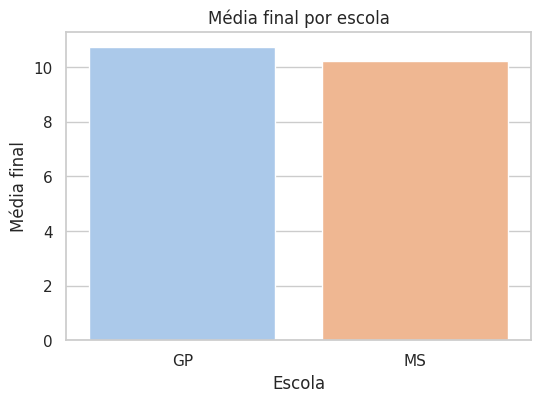

In [61]:
media_por_escola = df.groupby('school')['media'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='school', y='media', data=media_por_escola, palette='pastel')
plt.title('Média final por escola')
plt.ylabel('Média final')
plt.xlabel('Escola')
plt.show()

Este gráfico mostra o desempenho médio dos alunos por escola. Podemos comparar rapidamente qual escola teve melhor desempenho geral.


/tmp/ipython-input-62-1850775366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='media', data=df, palette='Set2')


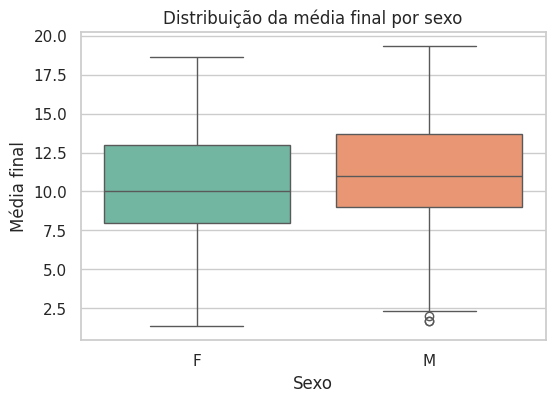

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='media', data=df, palette='Set2')
plt.title('Distribuição da média final por sexo')
plt.xlabel('Sexo')
plt.ylabel('Média final')
plt.show()

O boxplot exibe *a* mediana, os quartis e os valores extremos das médias finais por sexo. Isso ajuda a observar a variação interna entre os grupos.


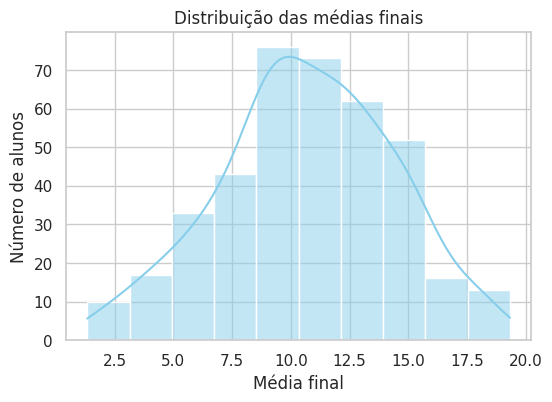

In [63]:
plt.figure(figsize=(6, 4))
sns.histplot(df['media'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição das médias finais')
plt.xlabel('Média final')
plt.ylabel('Número de alunos')
plt.show()

Este histograma mostra a concentração de alunos em determinadas faixas de média. Se houver muitos com notas entre 5 e 10, é um sinal de alerta para reforço.

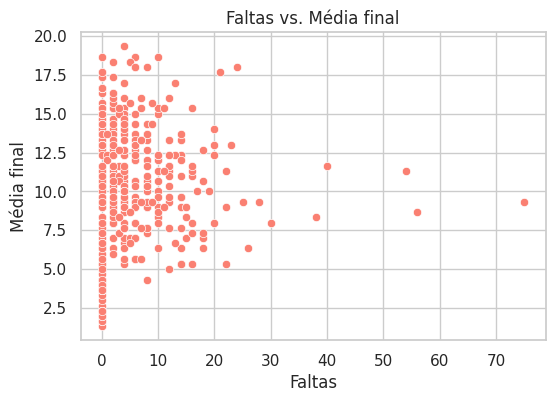

In [64]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='absences', y='media', data=df, color='salmon')
plt.title('Faltas vs. Média final')
plt.xlabel('Faltas')
plt.ylabel('Média final')
plt.show()

O gráfico de dispersão mostra a relação entre o número de faltas (eixo X) e a média final dos alunos (eixo Y).
Nota-se que a maioria dos alunos que faltam pouco (entre 0 e 10 faltas) concentram-se em médias finais maiores, geralmente acima de 10. Isso indica que presença regular nas aulas está associada a um melhor desempenho.
Para alunos com muitas faltas (mais de 15), a média final tende a ser mais baixa, com muitos deles abaixo de 10, sugerindo um impacto negativo das ausências no aprendizado.
Apesar de alguns pontos fora dessa tendência, onde alunos com muitas faltas apresentam médias razoáveis, eles são exceções e provavelmente possuem outras variáveis positivas que compensam.
A dispersão dos dados indica que, embora as faltas sejam um fator importante, o desempenho não depende exclusivamente delas, e outros fatores também influenciam a média final.
Em resumo, o gráfico confirma que manter uma boa frequência escolar está correlacionado a melhores resultados acadêmicos, evidenciando a importância da presença constante do aluno.


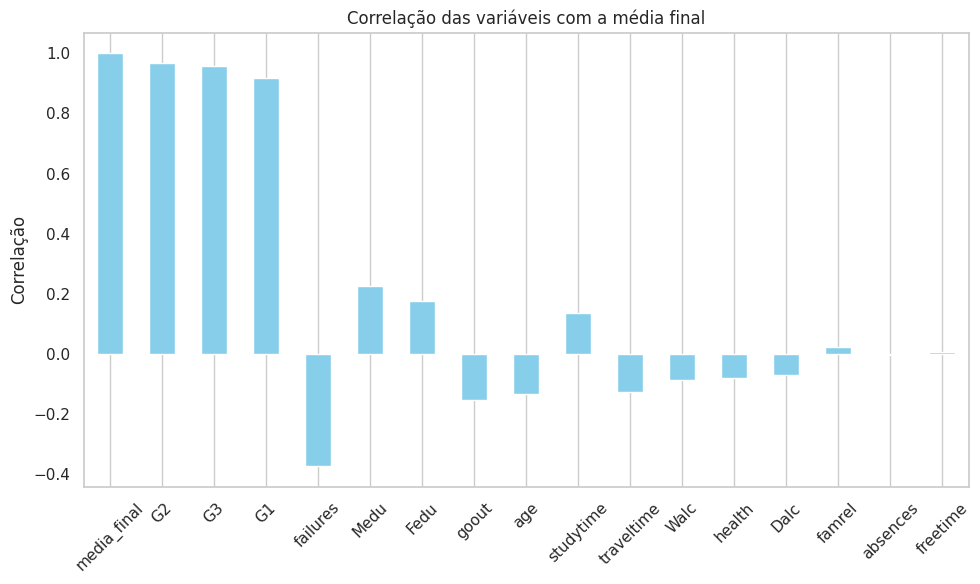

In [65]:
import matplotlib.pyplot as plt

correlacao_com_media = correlacao['media'].drop('media')  # Remove a própria média
correlacao_com_media = correlacao_com_media.reindex(correlacao_com_media.abs().sort_values(ascending=False).index)
plt.figure(figsize=(10,6))
correlacao_com_media.plot(kind='bar', color='skyblue')
plt.title('Correlação das variáveis com a média final')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Análise de Correlação com a Média Final

A análise de correlação permite identificar quais variáveis possuem maior influência sobre a média final dos alunos. Os resultados indicam:

- **G1 e G2**: Apresentaram correlação **altamente positiva**, o que confirma a expectativa: alunos que foram bem nas primeiras avaliações tendem a manter o bom desempenho até o final. Essas são as variáveis com maior impacto direto na `media`.

- **failures (número de reprovações anteriores)**: Apresentou correlação **negativa moderada**. Isso sugere que alunos com histórico de reprovações tendem a ter médias finais mais baixas.

- **absences (faltas)**: A correlação foi **negativa fraca**, indicando que o número de faltas tem alguma influência negativa, mas menos relevante que as notas anteriores.

- **studytime (tempo de estudo semanal)**: Apresenta **correlação positiva fraca**. Ou seja, estudar mais tende a ajudar, mas sozinho isso não garante alto desempenho.

- Outras variáveis como **goout (sair com amigos)** e **Dalc/Walc (consumo de álcool)** apresentaram correlações **muito baixas ou próximas de zero**, mostrando pouca ou nenhuma influência direta sobre a média final neste conjunto de dados.

Essa análise é essencial para **priorizar intervenções pedagógicas**, reforçando a importância de avaliações contínuas e estratégias para combater a evasão e reprovações anteriores.


In [66]:
media_por_medu = df.groupby('Medu')['media'].mean()
print(media_por_medu)

media_por_fedu = df.groupby('Fedu')['media'].mean()
print(media_por_fedu)

Medu
0    12.555556
1     9.197740
2    10.216828
3    10.451178
4    11.839695
Name: media, dtype: float64
Fedu
0    12.666667
1     9.426829
2    10.721739
3    10.716667
4    11.618056
Name: media, dtype: float64


### Educação dos Pais e Média dos Alunos

Os dados mostram que, em geral, alunos cujos pais têm níveis maiores de escolaridade tendem a ter médias finais maiores. Isso pode indicar que a educação dos pais influencia no desempenho dos filhos.


In [67]:
df[['absences', 'media']].head()


,absences,media
0,6,5.666667
1,4,5.333333
2,10,8.333333
3,2,14.666667
4,4,8.666667


## O que foi feito

Neste projeto, exploramos e analisamos a base de dados sobre desempenho escolar de estudantes. Realizamos as seguintes etapas:

- Importação e leitura da base de dados `student-mat.csv`.
- Exploração inicial dos dados, verificando tipos, colunas e algumas estatísticas básicas.
- Uso de listas, dicionários e tuplas para manipulação básica de dados.
- Aplicação de estruturas condicionais e laços para extrair informações específicas.
- Criação de novas colunas para calcular médias finais e simular recuperação.
- Análises estatísticas simples e agrupamentos para identificar padrões.
- Visualizações com gráficos de dispersão, barras, histogramas e heatmaps para facilitar a compreensão dos dados.
- Análise mais profunda focada em variáveis que influenciam o desempenho, como faltas, tempo de estudo e educação dos pais.

## O que os resultados mostram

- As notas parciais (`G1`, `G2` e `G3`) são fortemente correlacionadas com a média final, indicando que o desempenho constante ao longo do ano é fundamental.
- Alunos com maior número de faltas tendem a apresentar médias finais mais baixas, confirmando o impacto negativo do absenteísmo.
- O nível de educação dos pais (mãe e pai) está positivamente associado às médias dos alunos, sugerindo influência do ambiente familiar.
- O tempo dedicado ao estudo semanal está relacionado a melhores médias, mostrando a importância do hábito de estudo regular.
- O histórico de reprovações anteriores influencia negativamente o desempenho atual.
- Apesar dessas tendências, há variabilidade individual, indicando que outros fatores também afetam o desempenho dos alunos.


## Conclusões

Este projeto revelou padrões importantes no desempenho escolar dos alunos. Fatores como frequência às aulas, tempo de estudo e ambiente familiar desempenham papéis cruciais no sucesso acadêmico. Estratégias para reduzir faltas, incentivar o estudo contínuo e apoiar alunos com histórico de reprovações podem contribuir para melhores resultados escolares. O projeto também destaca a utilidade da análise de dados e visualização para compreender e agir sobre informações educacionais.
